<a href="https://colab.research.google.com/github/NBS92/Estatistica_N2/blob/main/Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informações da Avaliação

**Aluna:** Natalia Brito da Silva

**Nome da Tarefa:** Primeira avaliação da Nota 2

**Descrição:** Considere as instruções presentes no documento anexo.

*Como entregável, envie o link do notebook (Google Colaboratory). Não esqueça de compartilhá-lo para qualquer pessoa com o link.*

**Link do dataset no ICS, caso a dupla queira colocá-lo em seu próprio GitHub:** https://archive.ics.uci.edu/dataset/162/forest+fires

**Link do dataset no GitHub do professor, incluindo o documento de nomes dos atributos:** https://github.com/prof-jpontes/2024_Estatistica/tree/main/Datasets/fires

**Link para a importação direta do dataset no GitHub do professor:** (https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv)

# Exercício 1 - Distribuições de frequência

**Especificação:** Execute os passos para a geração de uma tabela resumo da distribuição de frequência de cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI). As colunas de cada tabela serão somente: classe, limite inferior, ponto médio, limite superior, frequência absoluta, frequência relativa, frequência acumulada (valor) e frequência acumulada (percentual).

---

**Entregável:** implemente um programa que imprima a tabela resumo da distribuição de frequência para cada um dos cinco atributos. Inclua todos os cálculos necessários no programa. Assuma que a quantidade de classes é uma constante ou variável.

---

**Observações:**

*   Para atributos categóricos, não há necessidade de executar todos os passos na construção da distribuição de frequência, sendo que a quantidade de categorias pode ser utilizada como número de classes, bastando determinar a frequência de cada categoria do atributo.

*   Qualquer dúvida veja as Tabelas 3.4, 3.6 e 3.7 do livro texto;

*   Note que as Tabelas 3.6 e 3.7 apresentam os resumos das distribuições de frequência dos atributos DMC e DC, respectivamente;

*   Observe que não é necessário incluir a coluna "Fronteiras".

---

✅ Tabela de distribuição de frequências dos 5 atributos

---


In [96]:
import numpy as np
import pandas as pd

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

def frequency_distribution(data, attribute, num_classes):
  if data[attribute].dtype == 'object':  # Atributos Categóricos
    frequency = data[attribute].value_counts().sort_index()
    relative_frequency = frequency / frequency.sum()
    cumulative_frequency = relative_frequency.cumsum()

    table = pd.DataFrame({
        'Classe': frequency.index,
        'Frequência Absoluta': frequency.values,
        'Frequência Relativa': relative_frequency.values,
        'Frequência Acumulada (Valor)': cumulative_frequency.values,
        'Frequência Acumulada (Percentual)': (cumulative_frequency * 100).values
    })

  else:  # Atributos Numéricos
    min_value = data[attribute].min()
    max_value = data[attribute].max()
    class_width = (max_value - min_value) / num_classes

    bins = [min_value + i * class_width for i in range(num_classes + 1)]
    frequency, _ = np.histogram(data[attribute], bins=bins)

    lower_limits = bins[:-1]
    upper_limits = bins[1:]

    # Calcula o ponto médio de cada classe
    midpoints = (np.array(lower_limits) + np.array(upper_limits)) / 2

    relative_frequency = frequency / frequency.sum()
    cumulative_frequency = relative_frequency.cumsum()

    table = pd.DataFrame({
        'Classe': range(1, num_classes + 1),
        'Limite Inferior': lower_limits,
        'Ponto Médio': midpoints,
        'Limite Superior': upper_limits,
        'Frequência Absoluta': frequency,
        'Frequência Relativa': relative_frequency,
        'Frequência Acumulada (Valor)': cumulative_frequency,
        'Frequência Acumulada (Percentual)': (cumulative_frequency * 100)
    })

  return table

# Número de classes desejado
num_classes = 5
attributes = ['day', 'month', 'DMC', 'DC', 'ISI']  # Lista de atributos

for attribute in attributes:  # Loop para cada atributo
  table = frequency_distribution(df, attribute, num_classes)  # Cria a tabela de distribuição de frequência
  print(f"Tabela de Distribução de Frequência - {attribute.upper()}:")  # Imprime o título da tabela
  print(table)  # Imprime a tabela
  print("\n")  # Pula uma linha para separar as tabelas


Tabela de Distribução de Frequência - DAY:
  Classe  Frequência Absoluta  Frequência Relativa  \
0    fri                   85             0.164410   
1    mon                   74             0.143133   
2    sat                   84             0.162476   
3    sun                   95             0.183752   
4    thu                   61             0.117988   
5    tue                   64             0.123791   
6    wed                   54             0.104449   

   Frequência Acumulada (Valor)  Frequência Acumulada (Percentual)  
0                      0.164410                          16.441006  
1                      0.307544                          30.754352  
2                      0.470019                          47.001934  
3                      0.653772                          65.377176  
4                      0.771760                          77.176015  
5                      0.895551                          89.555126  
6                      1.000000          

# Exercício 2 - Visualização de dados

**Especificação:** Para cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI), gere os seguintes gráficos:


1.   histogramas das frequências relativas e absolutas;
2.   gráfico de polígonos;
3.   gráfico de setores;
4.   gráfico de Pareto;
5.   gráfico de dispersão entre cada dois atributos, ou seja, DMC x Dia, DMC x Mês, DMC x DC, DMC x ISI, DC x Dia, DC x Mês, DC x ISI, ISI x Dia, ISI x Mês, Dia x Mês.

---

Além dos gráficos, inclua comentários sobre as informações obtidas pelas análises dos gráficos, deixando claro o gráfico e a informação obtida.

---

**Entregável:** implemente um programa que, baseado nos dados, plote os gráficos definidos acima. Os comentários sobre as informações obtidas pelas análises dos gráficos devem ser enviados em um arquivo PDF à parte.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

✅ Histogramas

---

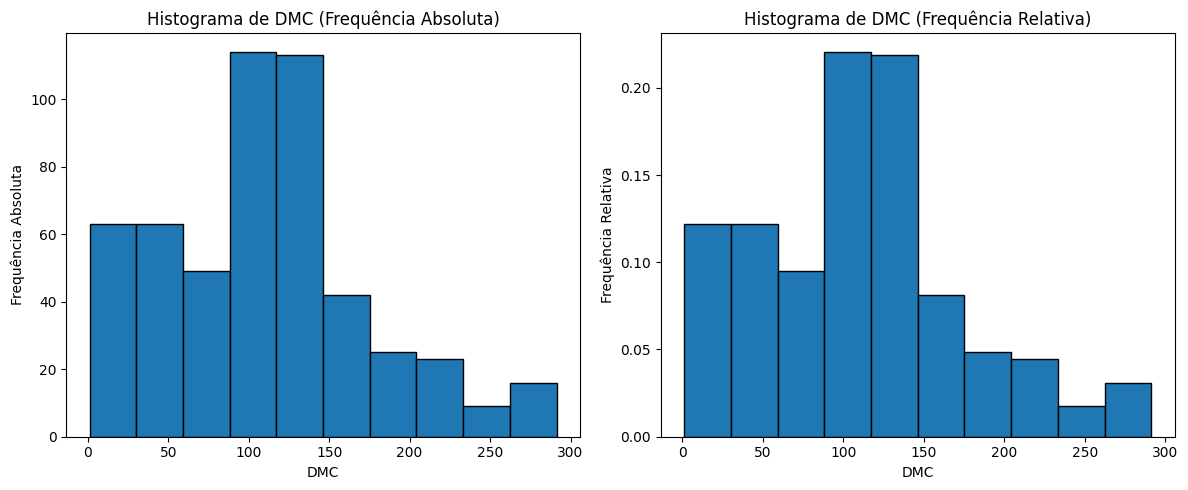

In [98]:
# DMC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['DMC'], bins=10, edgecolor='black')
plt.xlabel('DMC')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma de DMC (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['DMC'], bins=10, edgecolor='black', weights=np.ones_like(df['DMC']) / len(df['DMC']))
plt.xlabel('DMC')
plt.ylabel('Frequência Relativa')
plt.title('Histograma de DMC (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável DMC:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de DMC.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

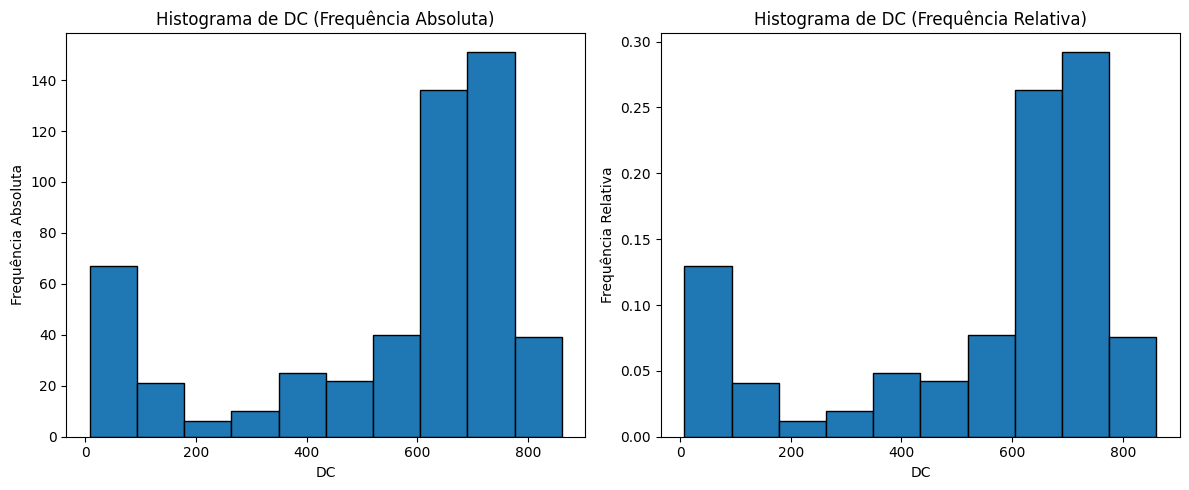

In [99]:
# DC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['DC'], bins=10, edgecolor='black')
plt.xlabel('DC')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma de DC (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['DC'], bins=10, edgecolor='black', weights=np.ones_like(df['DC']) / len(df['DC']))
plt.xlabel('DC')
plt.ylabel('Frequência Relativa')
plt.title('Histograma de DC (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável DC:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de DC.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

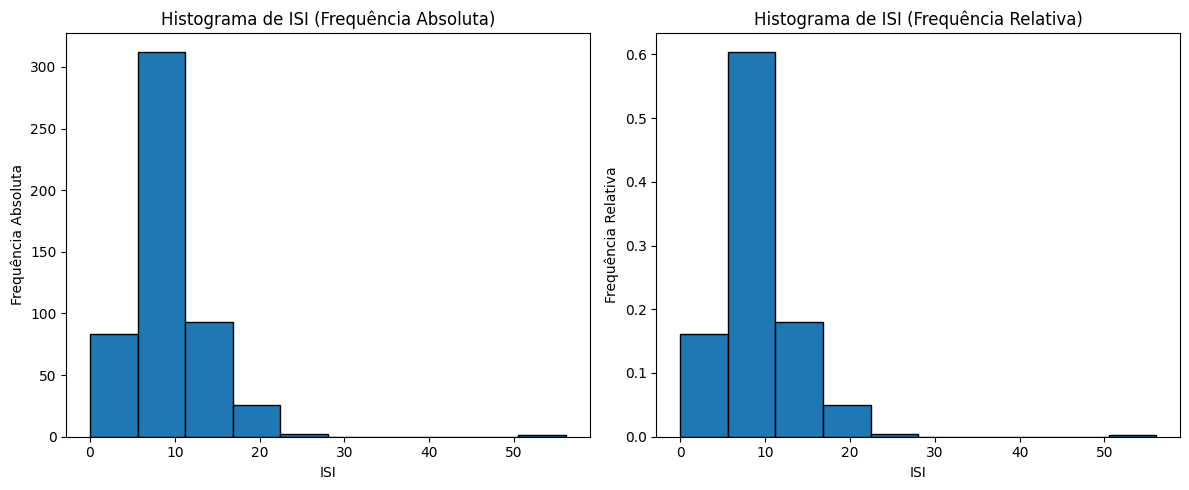

In [100]:
# ISI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['ISI'], bins=10, edgecolor='black')
plt.xlabel('ISI')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma de ISI (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['ISI'], bins=10, edgecolor='black', weights=np.ones_like(df['ISI']) / len(df['ISI']))
plt.xlabel('ISI')
plt.ylabel('Frequência Relativa')
plt.title('Histograma de ISI (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável ISI:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de ISI.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

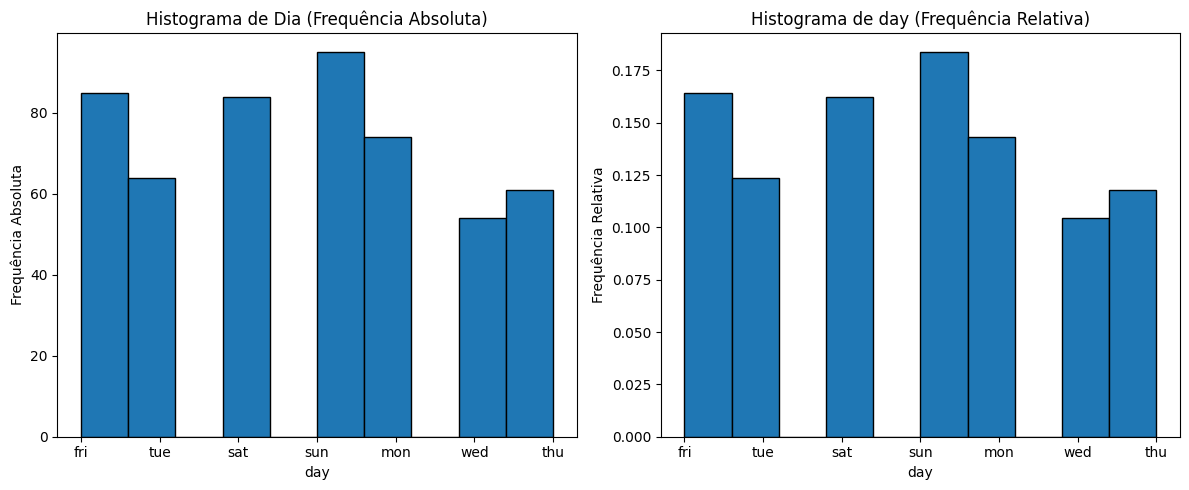

In [101]:
# day
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['day'], bins=10, edgecolor='black')
plt.xlabel('day')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma de Dia (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['day'], bins=10, edgecolor='black', weights=np.ones_like(df['day']) / len(df['day']))
plt.xlabel('day')
plt.ylabel('Frequência Relativa')
plt.title('Histograma de day (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável day:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de day.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

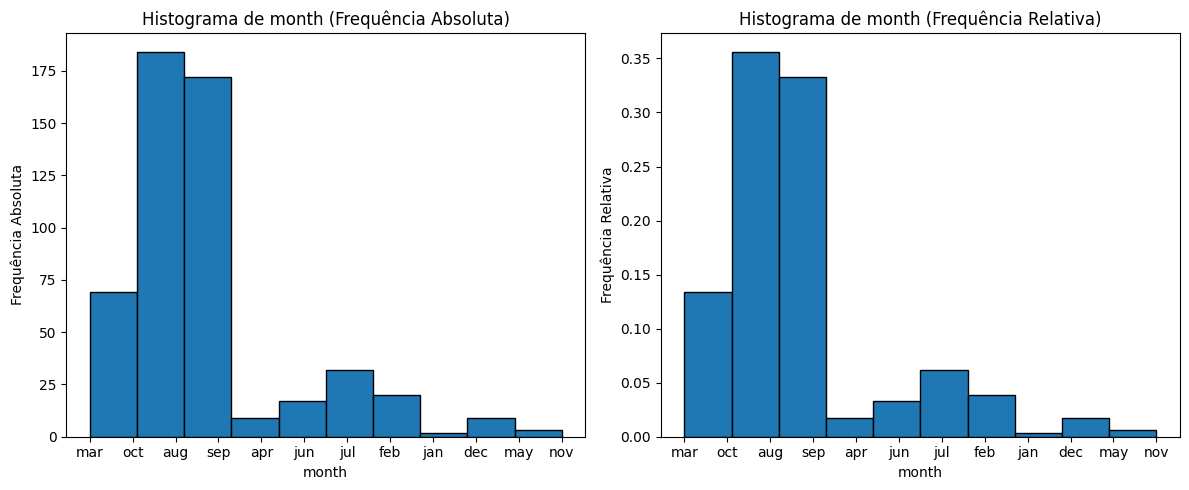

In [102]:
# month
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['month'], bins=10, edgecolor='black')
plt.xlabel('month')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma de month (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['month'], bins=10, edgecolor='black', weights=np.ones_like(df['month']) / len(df['month']))
plt.xlabel('month')
plt.ylabel('Frequência Relativa')
plt.title('Histograma de month (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável month:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de month.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

---

✅ Gráficos de Polígonos

---


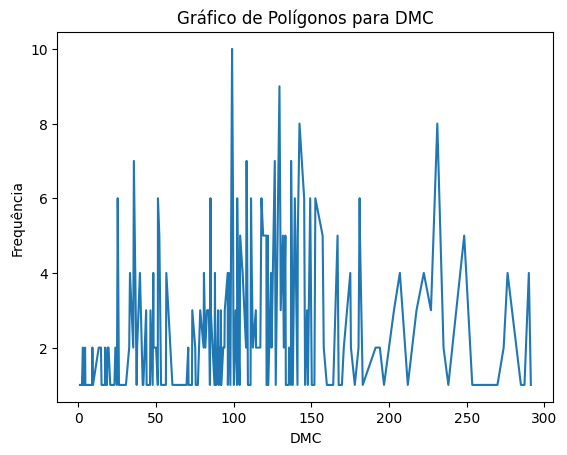

In [103]:
# DMC
plt.figure()
df['DMC'].value_counts().sort_index().plot(kind='line')
plt.xlabel('DMC')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para DMC')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada valor de DMC.
# Ele ajuda a visualizar como o número de incêndios varia de DMC para DMC e identificar padrões sazonais.

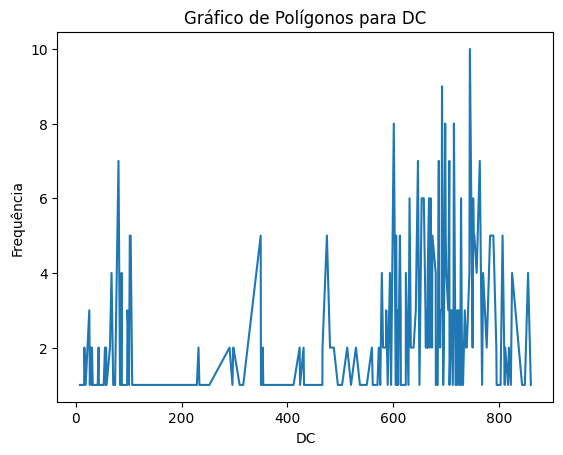

In [104]:
# DC
plt.figure()
df['DC'].value_counts().sort_index().plot(kind='line')
plt.xlabel('DC')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para DC')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada valor de DC.
# Ele ajuda a visualizar como o número de incêndios varia de DC para DC e identificar padrões sazonais.

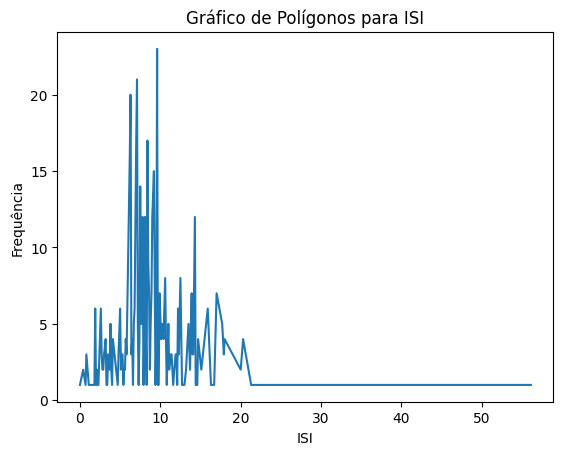

In [105]:
# ISI
plt.figure()
df['ISI'].value_counts().sort_index().plot(kind='line')
plt.xlabel('ISI')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para ISI')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada valor de ISI.
# Ele ajuda a visualizar como o número de incêndios varia de ISI para ISI e identificar padrões sazonais.

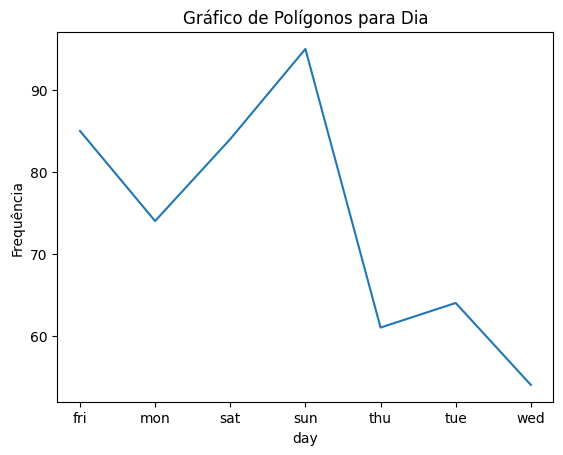

In [106]:
# day
plt.figure()
df['day'].value_counts().sort_index().plot(kind='line')
plt.xlabel('day')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para Dia')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada dia da semana.
# Ele ajuda a visualizar como o número de incêndios varia de dia para dia e identificar padrões sazonais.

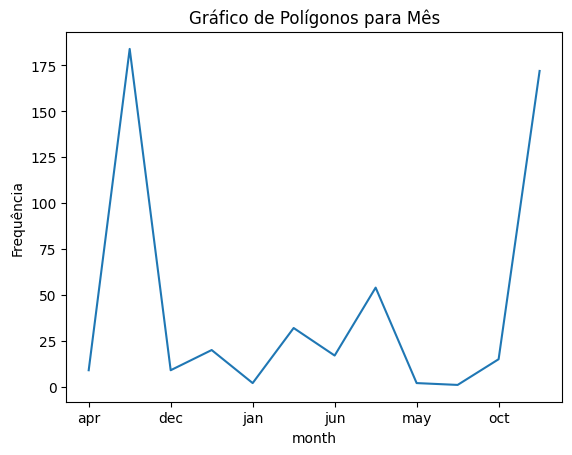

In [107]:
# month
plt.figure()
df['month'].value_counts().sort_index().plot(kind='line')
plt.xlabel('month')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para Mês')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada mês ao longo do ano.
# Ele ajuda a visualizar como o número de incêndios varia de mês para mês e identificar padrões sazonais.

---

✅ Gráficos de Setores

---


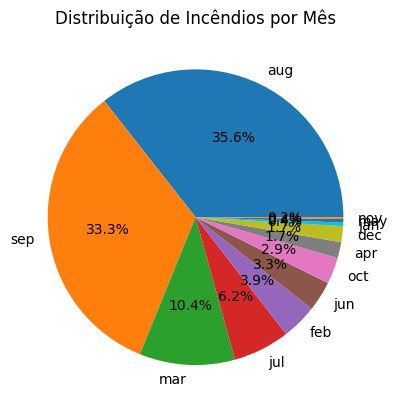

In [108]:
# month
plt.figure()
df['month'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribuição de Incêndios por Mês')
plt.show()

# O gráfico de pizza mostra a distribuição dos incêndios ao longo dos meses do ano.
# Ele ajuda a visualizar quais meses têm mais incêndios e a proporção de cada mês em relação ao total.

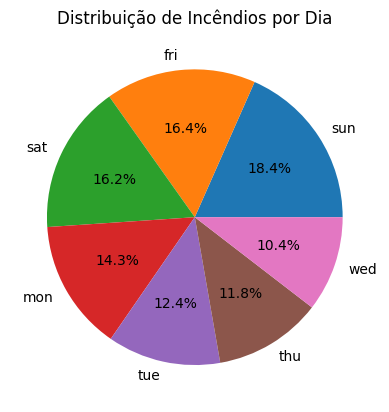

In [109]:
# day
plt.figure()
df['day'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribuição de Incêndios por Dia')
plt.show()

# O gráfico de pizza mostra a distribuição dos incêndios ao longo dos dias da semana.
# Ele ajuda a visualizar quais dias têm mais incêndios e a proporção de cada dia em relação ao total.

Gráficos de Pareto

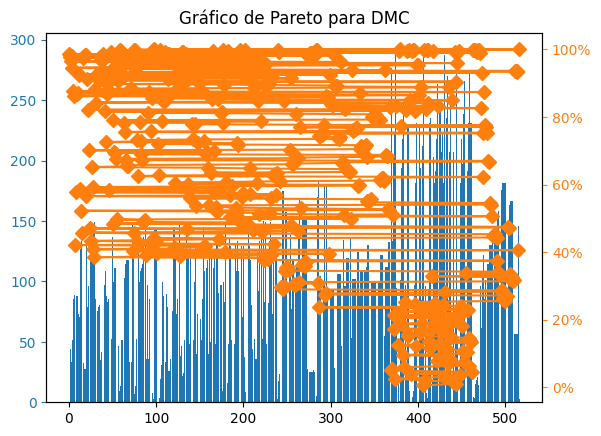

In [110]:
# DMC
from matplotlib.ticker import PercentFormatter

df_sorted = df.sort_values('DMC', ascending=False)
df_sorted['cumpercentage'] = df_sorted['DMC'].cumsum()/df_sorted['DMC'].sum()*100

fig, ax = plt.subplots()
ax.bar(df_sorted.index, df_sorted['DMC'], color="C0")
ax2 = ax.twinx()
ax2.plot(df_sorted.index, df_sorted['cumpercentage'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Gráfico de Pareto para DMC')
plt.show()

# O gráfico de Pareto mostra a distribuição do índice de seca `DMC` e a porcentagem acumulada desses índices.
# Ele ajuda a ver quais valores de `DMC` são mais frequentes e como eles somam para o total.

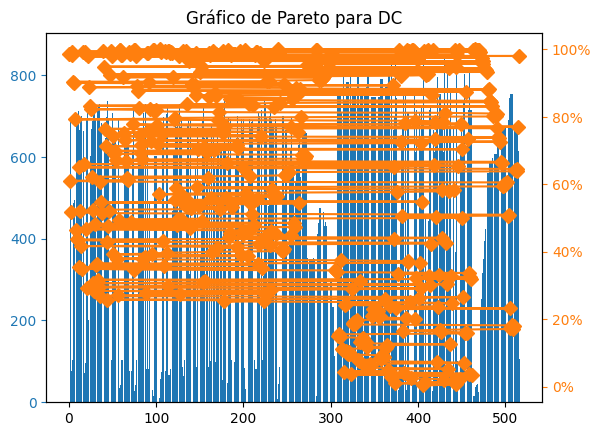

In [111]:
# DC
from matplotlib.ticker import PercentFormatter

df_sorted = df.sort_values('DC', ascending=False)
df_sorted['cumpercentage'] = df_sorted['DC'].cumsum()/df_sorted['DC'].sum()*100

fig, ax = plt.subplots()
ax.bar(df_sorted.index, df_sorted['DC'], color="C0")
ax2 = ax.twinx()
ax2.plot(df_sorted.index, df_sorted['cumpercentage'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Gráfico de Pareto para DC')
plt.show()

# O gráfico de Pareto mostra a distribuição do índice de umidade `DC` e a porcentagem acumulada desses índices.
# Ele ajuda a ver quais valores de `DC` são mais frequentes e como eles somam para o total.

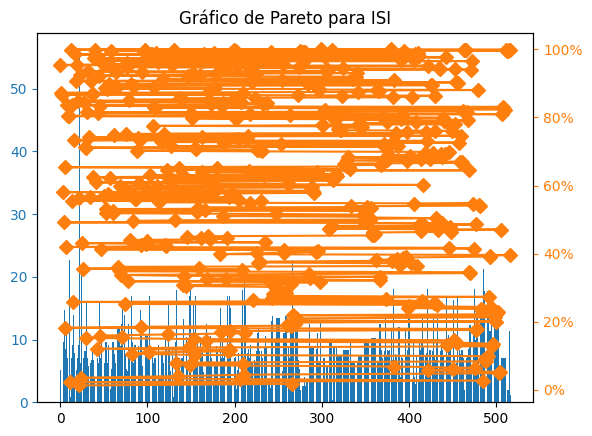

In [112]:
# ISI
from matplotlib.ticker import PercentFormatter

df_sorted = df.sort_values('ISI', ascending=False)
df_sorted['cumpercentage'] = df_sorted['ISI'].cumsum()/df_sorted['ISI'].sum()*100

fig, ax = plt.subplots()
ax.bar(df_sorted.index, df_sorted['ISI'], color="C0")
ax2 = ax.twinx()
ax2.plot(df_sorted.index, df_sorted['cumpercentage'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Gráfico de Pareto para ISI')
plt.show()


# O gráfico de Pareto mostra a distribuição do Índice de Severidade do Incêndio (ISI)
# e a porcentagem acumulada desses índices.
# Ele ajuda a identificar quais valores de ISI são mais comuns e como eles contribuem para o total.

---

✅ Gráficos de Dispersão

---


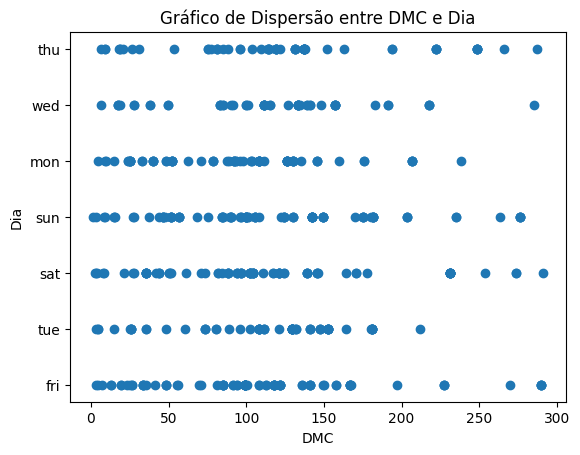

In [113]:
# DMC x Dia
plt.figure()
plt.scatter(df['DMC'], df['day'])
plt.xlabel('DMC')
plt.ylabel('Dia')
plt.title('Gráfico de Dispersão entre DMC e Dia')
plt.show()

# O gráfico de dispersão entre `DMC` e `Dia` mostra como o índice de seca varia ao longo dos dias da semana.
# Ele ajuda a ver se existe algum padrão ou ligação entre esses dois fatores, mostrando se o risco de incêndio
# muda dependendo do dia.

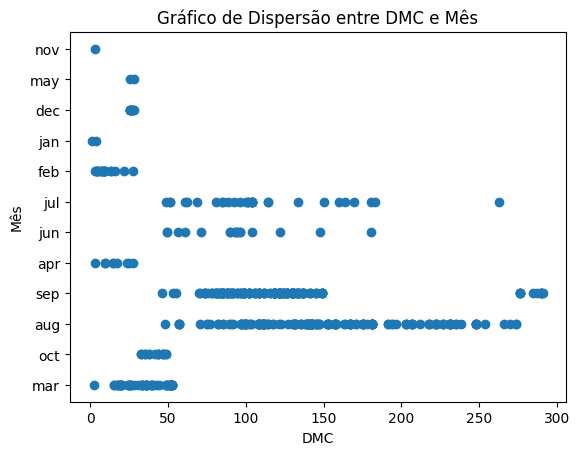

In [114]:
# DMC x Mês
plt.figure()
plt.scatter(df['DMC'], df['month'])
plt.xlabel('DMC')
plt.ylabel('Mês')
plt.title('Gráfico de Dispersão entre DMC e Mês')
plt.show()

# O gráfico de dispersão entre `DMC` e `Mês` mostra como o índice de seca muda ao longo do ano.
# Ele ajuda a ver se o nível de seca aumenta ou diminui em certos meses, o que pode mostrar quando
# o risco de incêndio é mais alto.

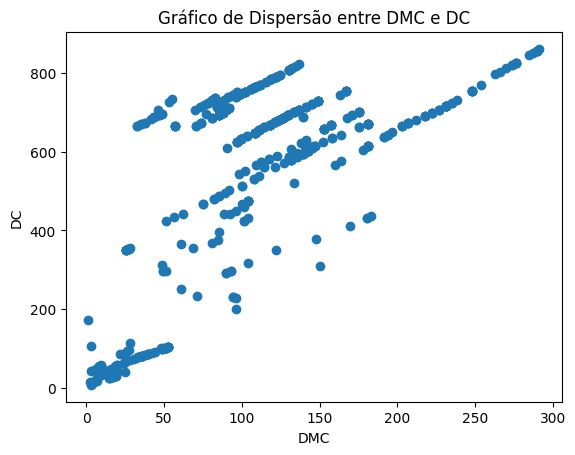

In [115]:
# DMC x DC
plt.figure()
plt.scatter(df['DMC'], df['DC'])
plt.xlabel('DMC')
plt.ylabel('DC')
plt.title('Gráfico de Dispersão entre DMC e DC')
plt.show()

# O gráfico mostra como o índice de seca `DMC` se relaciona com o índice de umidade `DC`.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois tipos de medida de seca e umidade.

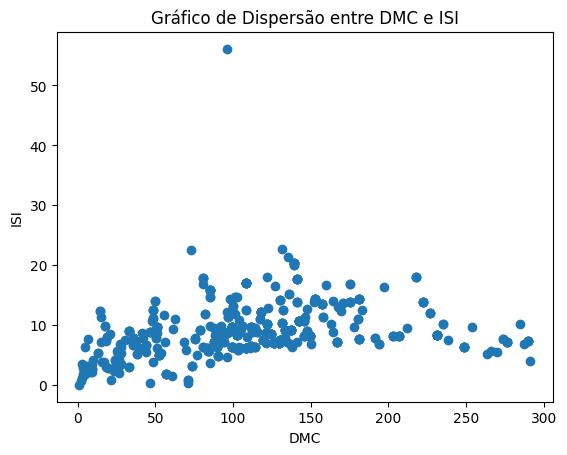

In [116]:
# DMC x ISI
plt.figure()
plt.scatter(df['DMC'], df['ISI'])
plt.xlabel('DMC')
plt.ylabel('ISI')
plt.title('Gráfico de Dispersão entre DMC e ISI')
plt.show()

# O gráfico mostra como o índice de seca `DMC` se relaciona com o Índice de Severidade do Incêndio `ISI`.
# Ele ajuda a ver se há uma conexão entre a seca e a severidade do incêndio.

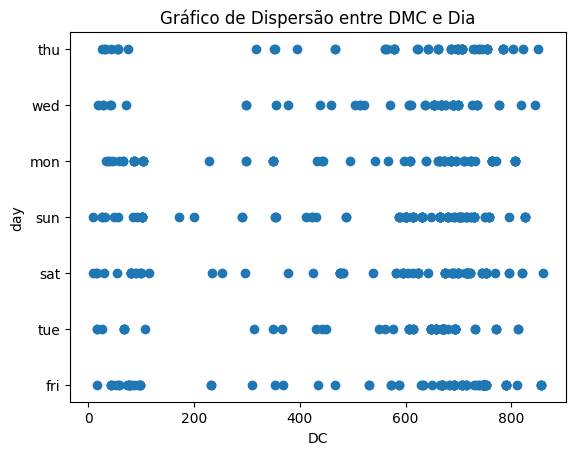

In [117]:
# DC x Dia
plt.figure()
plt.scatter(df['DC'], df['day'])
plt.xlabel('DC')
plt.ylabel('day')
plt.title('Gráfico de Dispersão entre DMC e Dia')
plt.show()

# O gráfico mostra como o índice de umidade `DC` se relaciona com o dia da semana.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

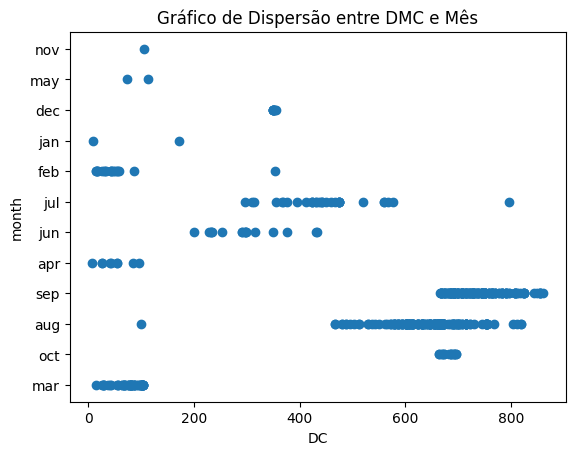

In [118]:
# DC x Mês
plt.figure()
plt.scatter(df['DC'], df['month'])
plt.xlabel('DC')
plt.ylabel('month')
plt.title('Gráfico de Dispersão entre DMC e Mês')
plt.show()

# O gráfico mostra como o índice de umidade `DC` se relaciona com o mês.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

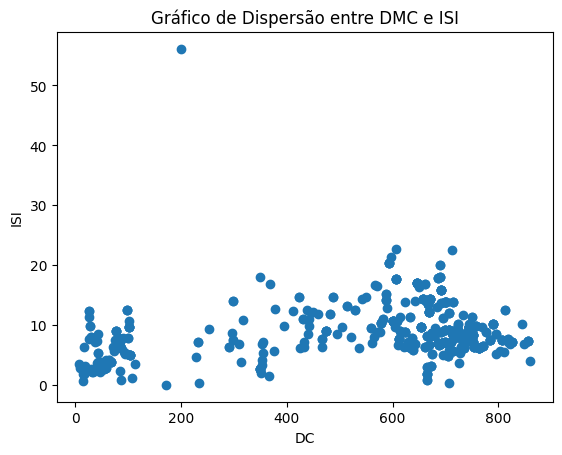

In [119]:
# DC x ISI
plt.figure()
plt.scatter(df['DC'], df['ISI'])
plt.xlabel('DC')
plt.ylabel('ISI')
plt.title('Gráfico de Dispersão entre DMC e ISI')
plt.show()

# O gráfico mostra como o índice de umidade `DC` se relaciona com o Índice de Severidade do Incêndio `ISI`.
# Ele ajuda a ver se há uma conexão entre a umidade e a severidade do incêndio.

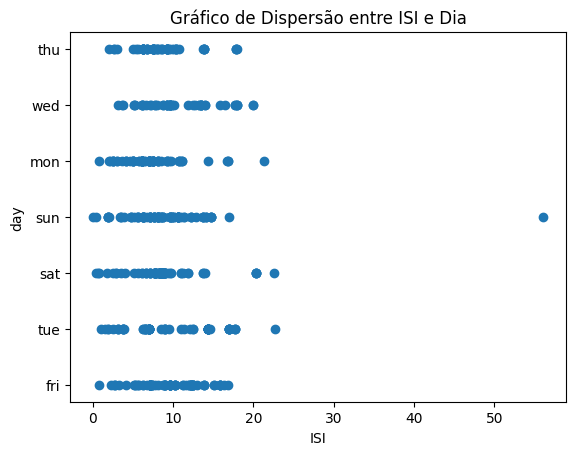

In [120]:
# ISI x Dia
plt.figure()
plt.scatter(df['ISI'], df['day'])
plt.xlabel('ISI')
plt.ylabel('day')
plt.title('Gráfico de Dispersão entre ISI e Dia')
plt.show()

# O gráfico mostra como o Índice de Severidade do Incêndio `ISI` se relaciona com o dia da semana.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

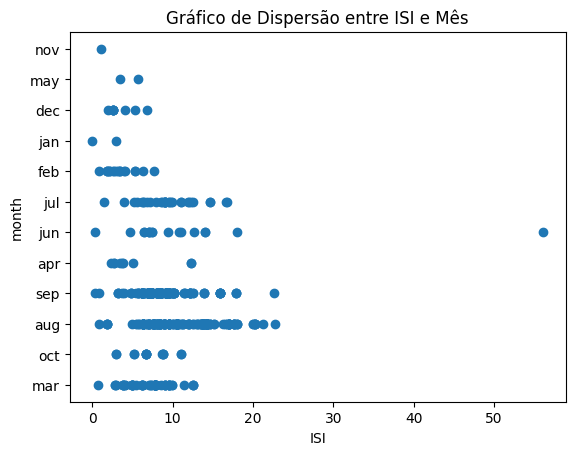

In [121]:
# ISI x Mês
plt.figure()
plt.scatter(df['ISI'], df['month'])
plt.xlabel('ISI')
plt.ylabel('month')
plt.title('Gráfico de Dispersão entre ISI e Mês')
plt.show()

# O gráfico mostra como o Índice de Severidade do Incêndio `ISI` se relaciona com o mês.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

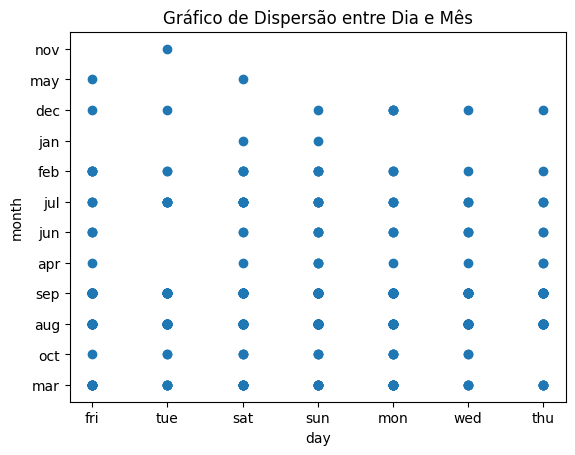

In [122]:
# Dia x Mês
plt.figure()
plt.scatter(df['day'], df['month'])
plt.xlabel('day')
plt.ylabel('month')
plt.title('Gráfico de Dispersão entre Dia e Mês')
plt.show()

# O gráfico mostra como o dia da semana se relaciona com o mês.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

# Exercício 3 - Medidas Resumo

**Especificação:** gere as medidas de tendência central (média, moda (quando for o caso), ponto médio e mediana), dispersão (amplitude, desvio padrão, variância, coeficiente de variação) e forma (assimetria e curtose), para cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI).

---

**Entregável:** implemente um programa que calcule e imprima a tabela contendo todas as informações acima.

---

**Observação:** a impressão da tabela pode ser em uma única tabela ou em três tabelas separadas.

---

✅ Atributo - day

---

In [123]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Converte a coluna 'dia' em representação numérica
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['day_numeric'] = df['day'].map(day_mapping) # cria uma nova coluna com dados numéricos

# Usa a coluna numérica para cálculos
media_day = df['day_numeric'].mean()
moda_day = df['day_numeric'].mode()[0]
ponto_medio_day = (df['day_numeric'].max() + df['day_numeric'].min()) / 2
mediana_day = df['day_numeric'].median()

amplitude_day = df['day_numeric'].max() - df['day_numeric'].min()
desvio_padrao_day = df['day_numeric'].std()
variancia_day = df['day_numeric'].var()
coeficiente_variacao_day = (desvio_padrao_day / media_day) * 100

assimetria_day = skew(df['day_numeric'])
curtose_day = kurtosis(df['day_numeric'])

# Cria a tabela
tabela_day = pd.DataFrame({
    'Medida': ['Média', 'Moda', 'Ponto Médio', 'Mediana', 'Amplitude',
               'Desvio Padrão', 'Variância', 'Coeficiente de Variação',
               'Assimetria', 'Curtose'],
    'Valor': [media_day, moda_day, ponto_medio_day, mediana_day, amplitude_day,
              desvio_padrao_day, variancia_day, coeficiente_variacao_day,
              assimetria_day, curtose_day]
})

print(tabela_day)


                    Medida      Valor
0                    Média   4.259188
1                     Moda   7.000000
2              Ponto Médio   4.000000
3                  Mediana   5.000000
4                Amplitude   6.000000
5            Desvio Padrão   2.072929
6                Variância   4.297033
7  Coeficiente de Variação  48.669575
8               Assimetria  -0.212350
9                  Curtose  -1.284738


---


✅ Atributo - month


---

In [124]:
import pandas as pd

# Converte a coluna 'month' em representação numérica
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_numeric'] = df['month'].map(month_mapping)

# Usa a coluna numérica para cálculos
media_month = df['month_numeric'].mean()

# Realiza algumas verificações
modes_month = df['month_numeric'].mode()
if len(modes_month) == 1:
  moda_month = modes_month[0]
else:
  moda_month = "Multiple modes"
ponto_medio_month = (df['month_numeric'].max() + df['month_numeric'].min()) / 2
mediana_month = df['month_numeric'].median()

amplitude_month = df['month_numeric'].max() - df['month_numeric'].min()
desvio_padrao_month = df['month_numeric'].std()
variancia_month = df['month_numeric'].var()
coeficiente_variacao_month = (desvio_padrao_month / media_month) * 100

assimetria_month = skew(df['month_numeric'])
curtose_month = kurtosis(df['month_numeric'])

# Cria a tabela
tabela_month = pd.DataFrame({
    'Medida': ['Média', 'Moda', 'Ponto Médio', 'Mediana', 'Amplitude',
               'Desvio Padrão', 'Variância', 'Coeficiente de Variação',
               'Assimetria', 'Curtose'],
    'Valor': [media_month, moda_month, ponto_medio_month, mediana_month, amplitude_month,
              desvio_padrao_month, variancia_month, coeficiente_variacao_month,
              assimetria_month, curtose_month]
})

print(tabela_month)

                    Medida      Valor
0                    Média   7.475822
1                     Moda   8.000000
2              Ponto Médio   6.500000
3                  Mediana   8.000000
4                Amplitude  11.000000
5            Desvio Padrão   2.275990
6                Variância   5.180131
7  Coeficiente de Variação  30.444681
8               Assimetria  -1.214476
9                  Curtose   0.626564


---

✅ Atributo - DMC

---

In [125]:
import pandas as pd

# Usa a coluna numérica para cálculos
media_DMC = df['DMC'].mean()

# Realiza algumas verificações
modes_DMC = df['DMC'].mode()
if len(modes_DMC) == 1:
  moda_DMC = modes_DMC[0]
else:
  moda_DMC = "Multiple modes"
ponto_medio_DMC = (df['DMC'].max() + df['DMC'].min()) / 2
mediana_DMC = df['DMC'].median()

amplitude_DMC = df['DMC'].max() - df['DMC'].min()
desvio_padrao_DMC = df['DMC'].std()
variancia_DMC = df['DMC'].var()
coeficiente_variacao_DMC = (desvio_padrao_DMC / media_DMC) * 100

assimetria_DMC = skew(df['DMC'])
curtose_DMC = kurtosis(df['DMC'])

# Cria a tabela
tabela_DMC = pd.DataFrame({
    'Medida': ['Média', 'Moda', 'Ponto Médio', 'Mediana', 'Amplitude',
               'Desvio Padrão', 'Variância', 'Coeficiente de Variação',
               'Assimetria', 'Curtose'],
    'Valor': [media_DMC, moda_DMC, ponto_medio_DMC, mediana_DMC, amplitude_DMC,
              desvio_padrao_DMC, variancia_DMC, coeficiente_variacao_DMC,
              assimetria_DMC, curtose_DMC]
})

print(tabela_DMC)

                    Medida        Valor
0                    Média   110.872340
1                     Moda    99.000000
2              Ponto Médio   146.200000
3                  Mediana   108.300000
4                Amplitude   290.200000
5            Desvio Padrão    64.046482
6                Variância  4101.951889
7  Coeficiente de Variação    57.765969
8               Assimetria     0.545908
9                  Curtose     0.191263


---

✅ Atributo - DC

---

In [126]:
import pandas as pd

# Usa a coluna numérica para cálculos
media_DC = df['DC'].mean()

# Realiza algumas verificações
modes_DC = df['DC'].mode()
if len(modes_DC) == 1:
  moda_DC = modes_DC[0]
else:
  moda_DC = "Multiple modes"
ponto_medio_DC = (df['DC'].max() + df['DC'].min()) / 2
mediana_DC = df['DC'].median()

amplitude_DC = df['DC'].max() - df['DC'].min()
desvio_padrao_DC = df['DC'].std()
variancia_DC = df['DC'].var()
coeficiente_variacao_DC = (desvio_padrao_DC / media_DC) * 100

assimetria_DC = skew(df['DC'])
curtose_DC = kurtosis(df['DC'])

# Cria a tabela
tabela_DC = pd.DataFrame({
    'Medida': ['Média', 'Moda', 'Ponto Médio', 'Mediana', 'Amplitude',
               'Desvio Padrão', 'Variância', 'Coeficiente de Variação',
               'Assimetria', 'Curtose'],
    'Valor': [media_DC, moda_DC, ponto_medio_DC, mediana_DC, amplitude_DC,
              desvio_padrao_DC, variancia_DC, coeficiente_variacao_DC,
              assimetria_DC, curtose_DC]
})

print(tabela_DC)

                    Medida         Valor
0                    Média    547.940039
1                     Moda    745.300000
2              Ponto Médio    434.250000
3                  Mediana    664.200000
4                Amplitude    852.700000
5            Desvio Padrão    248.066192
6                Variância  61536.835467
7  Coeficiente de Variação     45.272507
8               Assimetria     -1.097250
9                  Curtose     -0.254461


---

✅ Atributo - ISI

---

In [127]:
import pandas as pd

# Usa a coluna numérica para cálculos
media_ISI = df['ISI'].mean()

# Realiza algumas verificações
modes_ISI = df['ISI'].mode()
if len(modes_ISI) == 1:
  moda_ISI = modes_ISI[0]
else:
  moda_ISI = "Multiple modes"
ponto_medio_ISI = (df['ISI'].max() + df['ISI'].min()) / 2
mediana_ISI = df['ISI'].median()

amplitude_ISI = df['ISI'].max() - df['ISI'].min()
desvio_padrao_ISI = df['ISI'].std()
variancia_ISI = df['ISI'].var()
coeficiente_variacao_ISI = (desvio_padrao_ISI / media_ISI) * 100

assimetria_ISI = skew(df['ISI'])
curtose_ISI = kurtosis(df['ISI'])

# Cria a tabela
tabela_ISI = pd.DataFrame({
    'Medida': ['Média', 'Moda', 'Ponto Médio', 'Mediana', 'Amplitude',
               'Desvio Padrão', 'Variância', 'Coeficiente de Variação',
               'Assimetria', 'Curtose'],
    'Valor': [media_ISI, moda_ISI, ponto_medio_ISI, mediana_ISI, amplitude_ISI,
              desvio_padrao_ISI, variancia_ISI, coeficiente_variacao_ISI,
              assimetria_ISI, curtose_ISI]
})

print(tabela_ISI)

                    Medida      Valor
0                    Média   9.021663
1                     Moda   9.600000
2              Ponto Médio  28.050000
3                  Mediana   8.400000
4                Amplitude  56.100000
5            Desvio Padrão   4.559477
6                Variância  20.788832
7  Coeficiente de Variação  50.539207
8               Assimetria   2.528961
9                  Curtose  21.239490


# Exercício 4 - Diagrama de Caixa (box plot)

**Especificação:** imprima os diagramas de caixa (box plot) de cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI).

---

**Entregável:** implemente um programa que calcule e imprima os diagramas de caixa (box plot) de cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI).

Comente sobre a Variabilidade de cada um dos atributos.

---

**Observação:** Os comentários sobre a variabilidade de cada atributo devem ser enviados em um arquivo PDF à parte.

In [128]:
import matplotlib.pyplot as plt

---

✅ Atributo - day

---


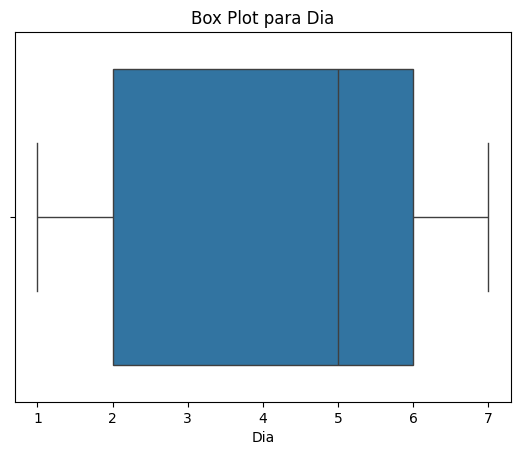

In [129]:
plt.figure()
sns.boxplot(x=df['day_numeric'])
plt.xlabel('Dia')
plt.title('Box Plot para Dia')
plt.show()

# O box plot para o dia mostra como os valores estão distribuídos ao longo da semana.
# A variabilidade é representada pelo comprimento da caixa e das "mãos" do gráfico,
# indicando a diferença entre os dias com menor e maior frequência de incêndios.

---

✅ Atributo - month

---


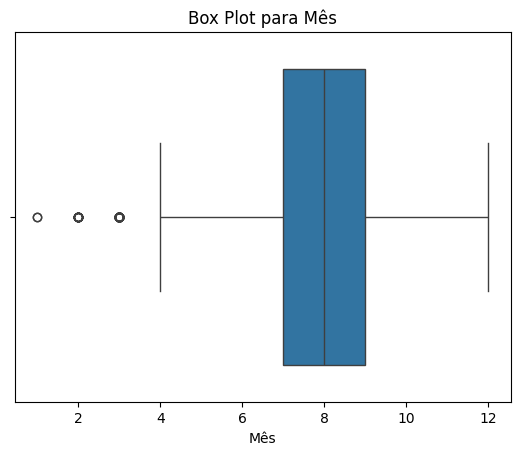

In [130]:
plt.figure()
sns.boxplot(x=df['month_numeric'])
plt.xlabel('Mês')
plt.title('Box Plot para Mês')
plt.show()

# O box plot para o mês mostra como os valores estão distribuídos ao longo do ano.
# A variabilidade é representada pelo comprimento da caixa e das "mãos" do gráfico,
# indicando a diferença entre os meses com menor e maior frequência de incêndios.

---

✅ Atributo - DMC

---


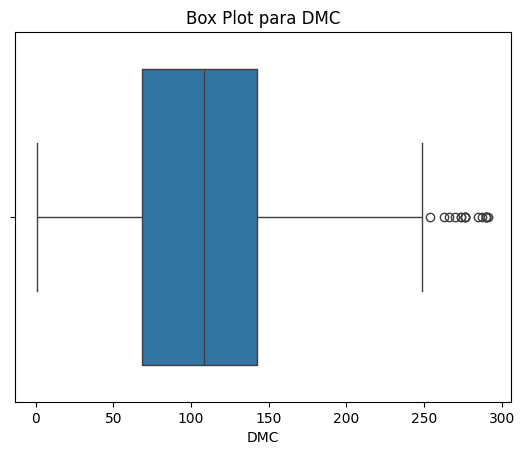

In [131]:
plt.figure()
sns.boxplot(x=df['DMC'])
plt.xlabel('DMC')
plt.title('Box Plot para DMC')
plt.show()

# O box plot para o índice de seca mostra como os valores estão distribuídos ao longo do ano.
# A variabilidade é representada pelo comprimento da caixa e das "mãos" do gráfico,
# indicando a diferença entre os meses com menor e maior frequência de incêndios.

---

✅ Atributo - DC

---


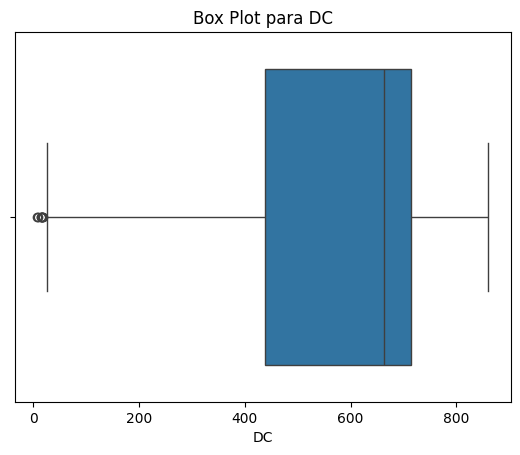

In [132]:
plt.figure()
sns.boxplot(x=df['DC'])
plt.xlabel('DC')
plt.title('Box Plot para DC')
plt.show()

# O box plot para o índice de umidade mostra como os valores estão distribuídos ao longo do ano.
# A caixa mostra a faixa onde estão os 50% centrais dos dados, enquanto as "mãos" mostram a variação geral.
# Pontos fora das "mãos" são valores atípicos, indicando umidade extrema ou anomalias.

---

✅ Atributo - ISI

---


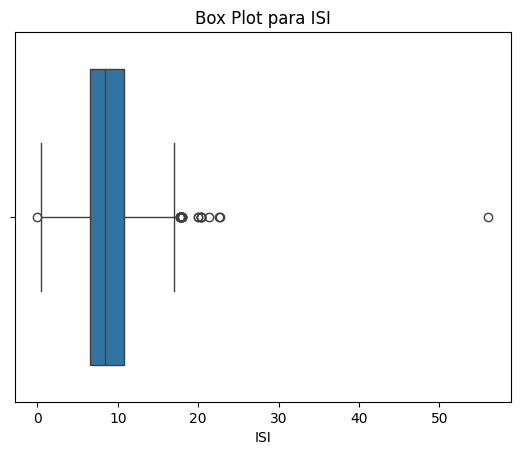

In [133]:
plt.figure()
sns.boxplot(x=df['ISI'])
plt.xlabel('ISI')
plt.title('Box Plot para ISI')
plt.show()

# O box plot para o Índice de Severidade do Incêndio.
# A caixa representa a faixa central onde a maioria dos valores está concentrada,
# enquanto as "mãos" indicam a variação geral.
# Valores fora dessas mãos são considerados atípicos, indicando possíveis eventos extremos.

# Exercício 5 - Medidas de Associação

**Especificação:** imprima os gráficos de dispersão entre os atributos Dia e Mês, DMC e DC, DMC e ISI, e DC e ISI.

---

**Entregável:** implemente um programa que calcule e imprima os quatro gráficos de dispersão definidos acima.

Baseado nos gráficos de dispersão, comente sobre a
associatividade entre cada um dos quatro pares de atributos (correlação positiva, correlação negativa, sem correlação, etc).

---

**Observação:** Os comentários sobre a associatividade entre os quatro pares de atributos devem ser enviados em um arquivo PDF à parte.

---

✅ Gráficos de dispersão entre os atributos - Dia e Mês

---

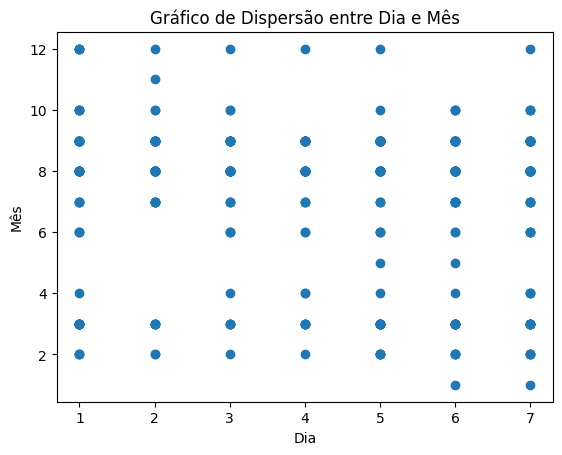

In [134]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['day_numeric'], df['month_numeric'])
plt.xlabel('Dia')
plt.ylabel('Mês')
plt.title('Gráfico de Dispersão entre Dia e Mês')
plt.show()

# Não parece haver uma correlação clara entre o dia da semana e o mês em que ocorrem os incêndios.
# Os pontos estão espalhados aleatoriamente pelo gráfico, sem um padrão discernível.

---

✅ Gráficos de dispersão entre os atributos - DMC e
DC

---

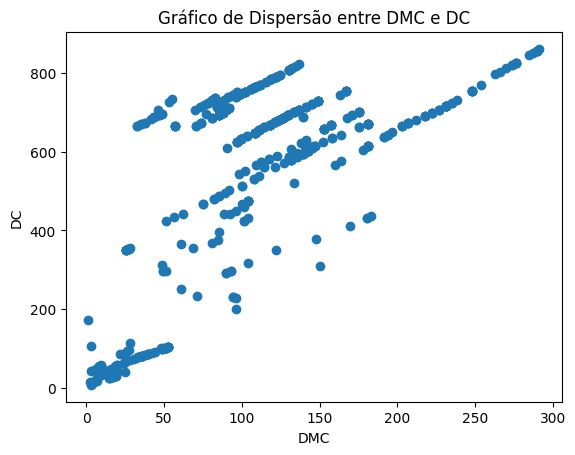

In [135]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['DMC'], df['DC'])
plt.xlabel('DMC')
plt.ylabel('DC')
plt.title('Gráfico de Dispersão entre DMC e DC')
plt.show()

# O gráfico de dispersão entre DMC e DC sugere uma correlação negativa,
# embora não seja perfeitamente linear. Isso indica que, à medida que o índice de
# seca (DMC) aumenta, o índice de umidade do combustível (DC) tende a diminuir,
# o que é intuitivo, já que condições mais secas geralmente levam a menor umidade
# nos combustíveis. No entanto, a dispersão dos pontos indica que outros fatores
# também podem influenciar a relação entre DMC e DC.

---

✅ Gráficos de dispersão entre os atributos - DMC e
ISI

---

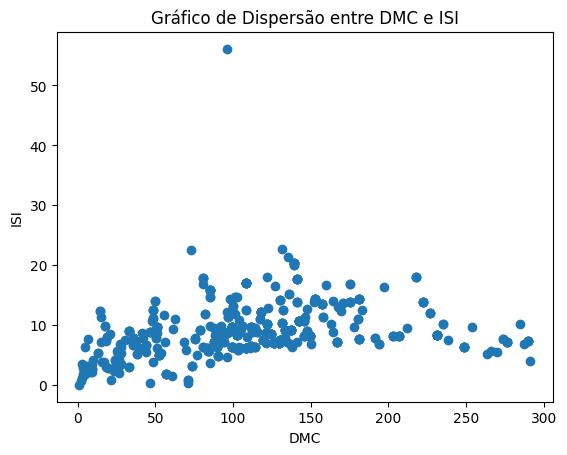

In [136]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['DMC'], df['ISI'])
plt.xlabel('DMC')
plt.ylabel('ISI')
plt.title('Gráfico de Dispersão entre DMC e ISI')
plt.show()

# O gráfico de dispersão entre DMC e ISI sugere uma correlação positiva moderada.
# Isso indica que, à medida que o índice de seca (DMC) aumenta, o Índice de Severidade do
# Incêndio (ISI) também tende a aumentar. Essa relação faz sentido, pois condições mais
# secas facilitam a propagação e a intensificação dos incêndios. No entanto, a dispersão
# dos pontos indica que outros fatores além do DMC também contribuem para a severidade
# do incêndio.

---

✅ Gráficos de dispersão entre os atributos - DC e
ISI

---

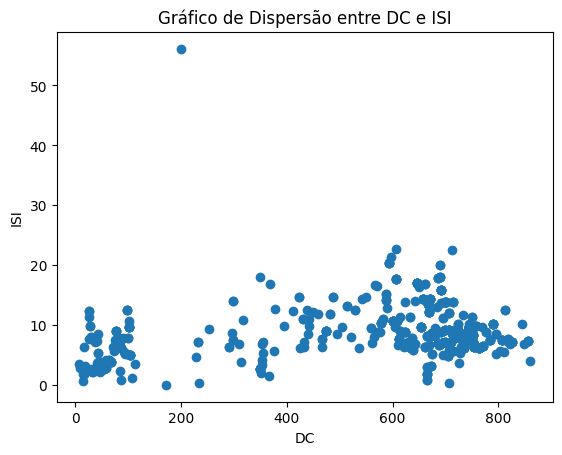

In [137]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['DC'], df['ISI'])
plt.xlabel('DC')
plt.ylabel('ISI')
plt.title('Gráfico de Dispersão entre DC e ISI')
plt.show()

# O gráfico de dispersão entre DC e ISI sugere uma correlação negativa,
# embora com uma dispersão considerável dos pontos. Isso indica que,
# em geral, à medida que o índice de umidade do combustível (DC) aumenta,
# o Índice de Severidade do Incêndio (ISI) tende a diminuir.
# Essa relação é esperada, pois combustíveis mais úmidos são mais
# difíceis de inflamar e sustentar a queima. A dispersão dos pontos
# sugere que outros fatores além do DC também influenciam o ISI.